Download sample images

In [3]:
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import requests
import numpy as np

lena_url = 'https://camo.githubusercontent.com/0126636c94b7b4016f05c40c25e7710b218ba33ddc35836f4d0c5d62ad5a24a2/68747470733a2f2f7261772e6769746875622e636f6d2f6d696b6f6c616c7973656e6b6f2f6c656e612f6d61737465722f6c656e612e706e67'
madrill_url = 'https://raw.githubusercontent.com/mikolalysenko/baboon-image/master/baboon.png'

x, y, width, height = 100, 100, 200, 200  # Example coordinates and dimensions for crop

# Download the image from the link
response_lena = requests.get(lena_url)
image_lena = Image.open(BytesIO(response_lena.content))
image_lena.save('lena.png')


response_madrill = requests.get(madrill_url)
image_mandrill = Image.open(BytesIO(response_madrill.content))
image_mandrill.save('mandrill.png')

# Sobel Filtering

libpng warning: iCCP: known incorrect sRGB profile


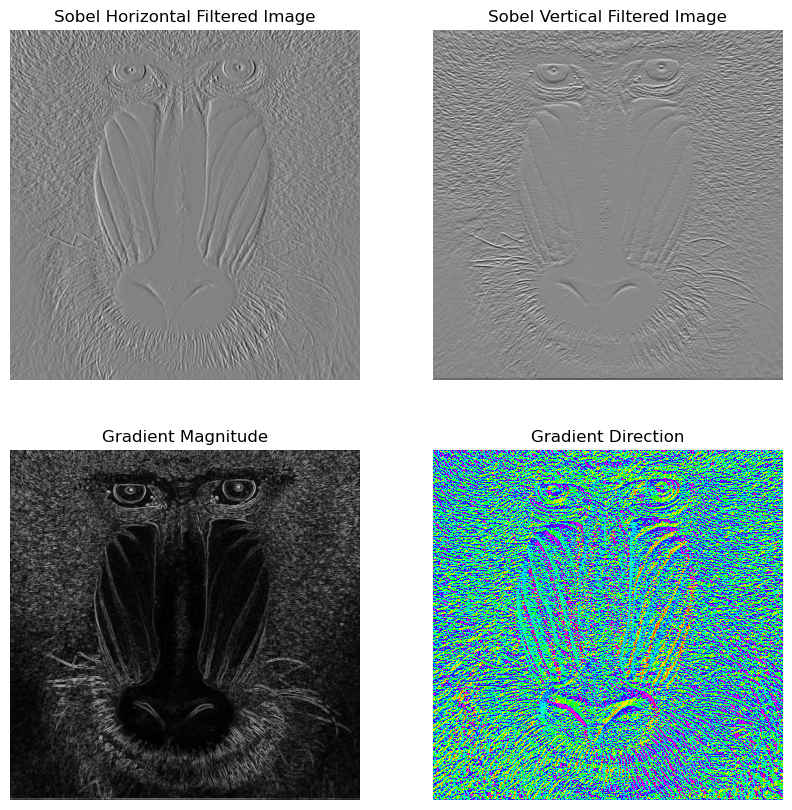

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
img = cv2.imread('mandrill.png', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filtering to get horizontal and vertical gradient components
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# sobely = cv2.convertScaleAbs(sobely)

# Calculate magnitude and direction of the gradient
magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
direction = np.arctan2(sobely, sobelx)

# Display the images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel Horizontal Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Vertical Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(direction, cmap='hsv')
plt.title('Gradient Direction')
plt.axis('off')

plt.show()


# Image Denoising

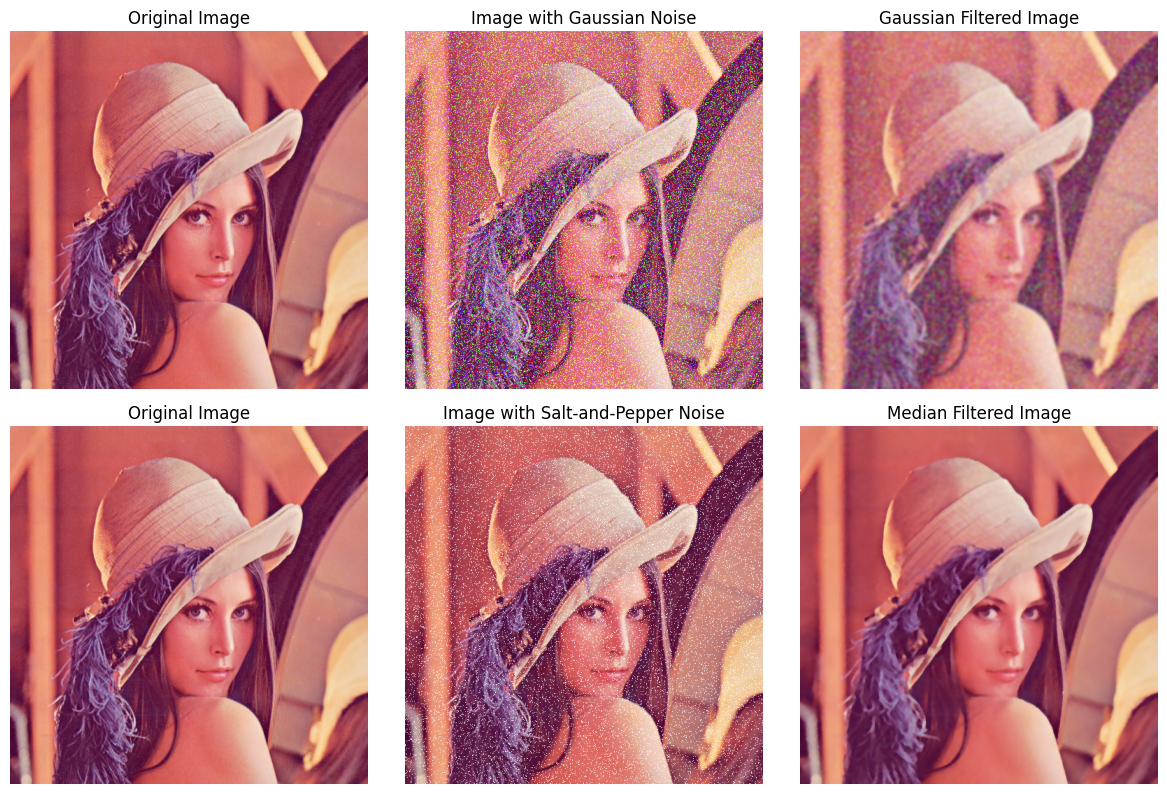

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
input_image = cv2.imread('lena.png')


# Apply Gaussian noise
gaussian_noise = np.random.normal(loc=0, scale=1, size=input_image.shape).astype(np.uint8)
image_with_gaussian_noise = cv2.add(input_image, gaussian_noise)

# Apply salt-and-pepper noise
salt_pepper_noise = np.zeros_like(input_image)
salt_pepper_noise[np.random.random(size=input_image.shape[:2]) < 0.07] = 255
salt_pepper_noise[np.random.random(size=input_image.shape[:2]) > 0.99] = 0
image_with_salt_pepper_noise = cv2.add(input_image, salt_pepper_noise)

# Apply Gaussian filter to remove Gaussian noise
gaussian_filtered_image = cv2.GaussianBlur(image_with_gaussian_noise, (9, 9), 2)

# Apply median filter to remove salt-and-pepper noise
median_filtered_image = cv2.medianBlur(image_with_salt_pepper_noise, 5)


# Display the images
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(image_with_gaussian_noise, cv2.COLOR_BGR2RGB))
plt.title('Image with Gaussian Noise')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(image_with_salt_pepper_noise, cv2.COLOR_BGR2RGB))
plt.title('Image with Salt-and-Pepper Noise')
plt.axis('off')


plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# Generate 2 different Gaussian Noisy images and filter them appropriately using Gaussian blur by playing around with the parameters.
# Generate 2 different Salt and Pepper noisy images and perform median filtering with varied parameters
# Experiment by perform Gaussian filter first, followed by median filtering and vice versa
# Display all results in the following format with appropriate titles:
# (Gaussian Noisy Image 1)         (Gaussian Filtered Image 1)  (Gaussian Noisy Image 2)        (Gaussian Filtered Image 2)
# (Salt and Pepper Noisy Image 1)  (median Filtered Image 1)    (Salt and Pepper Noisy Image 2) (median Filtered Image 2)
# (Gaussian Noisy Image 1)         (Result of gaussian filtering followed by median filter)  (Result of median filter followed by Gaussian filter)
# (Salt and Pepper Noisy Image 1)  (Result of gaussian filtering followed by median filter)  (Result of median filter followed by Gaussian filter)



# Gaussian Pyramid

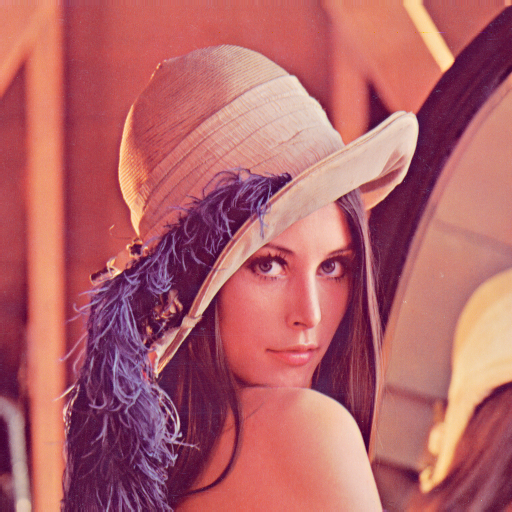

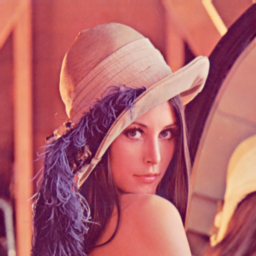

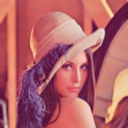

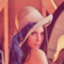

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def gaussian_pyramid(image, levels):
    pyramid = [image]
    for _ in range(levels - 1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# Example usage
image = cv2.imread('lena.png')
levels = 4
pyramid = gaussian_pyramid(image, levels)

# Display pyramid images
for i, img in enumerate(pyramid):
    cv2_imshow(img)


 # Perform mannual sub-sampling in order to get the Gaussian Pyramid and display the images at the same scale
 # Now in each step before sub-sampling, first blur the image and then repeat the process
